
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

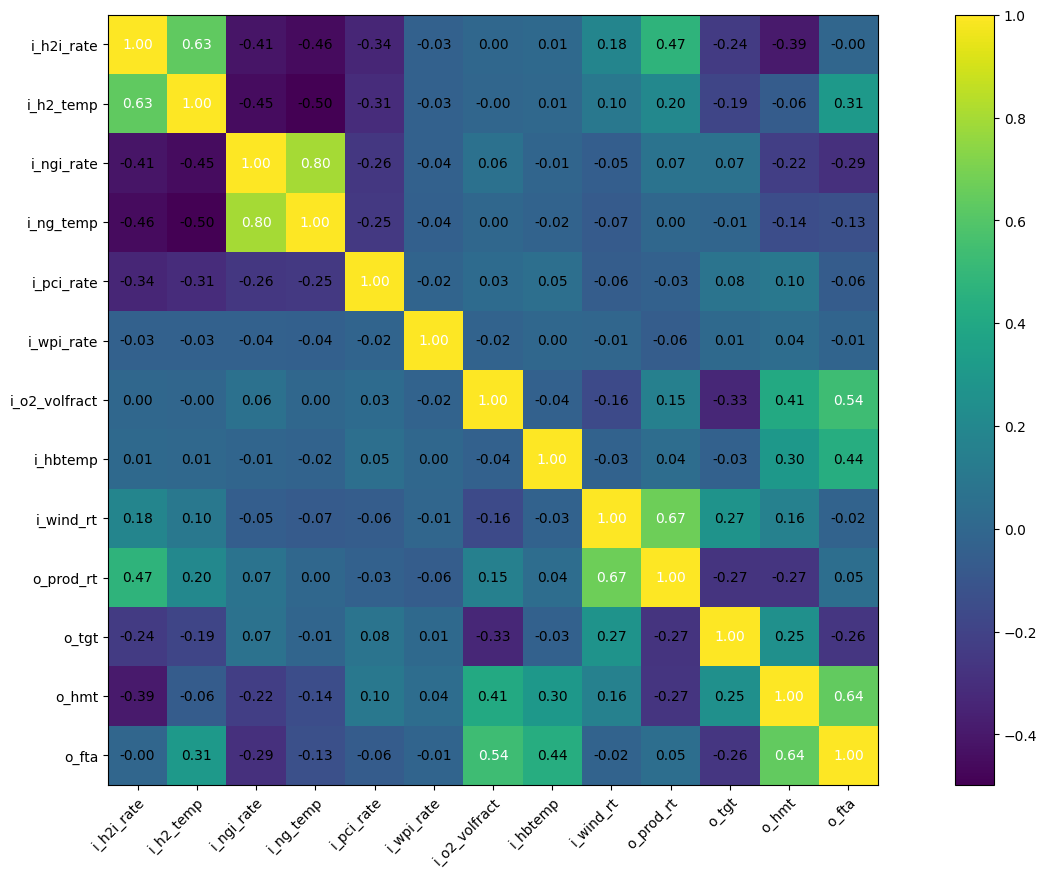

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [21]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [22]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [23]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [24]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [25]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.9365308880805969
100 ..... 0.3256872296333313
200 ..... 0.558038055896759
300 ..... 0.4653516113758087
400 ..... 0.35011547803878784
500 ..... 0.2994644045829773
600 ..... 0.46658268570899963
700 ..... 0.33170798420906067
800 ..... 0.5162407159805298
900 ..... 0.32162418961524963


In [26]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  98.0911, 1297.0841, 8425.1084, 2305.0857]])
y_deviations: tensor([[  51.4006,  522.0092, 1516.9159,  209.5664]])
x_means: tensor([[     0.0000,      0.0000,      0.0000,     -0.0000]])
x_deviations: tensor([[362.7044, 158.5781,  51.6114,  31.1047]])


In [27]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  46.6906,  775.0750, 6908.1924, 2095.5193]])
tensor([[ 149.4917, 1819.0933, 9942.0244, 2514.6521]])



## Is model  invertible ?

* use the Jacobian


In [28]:

import torch
from torch.autograd.functional import jacobian


In [29]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [30]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [31]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [32]:

print( len(J) )


1


In [33]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [34]:

u, s, v = torch.svd(J)  


In [35]:

rank = (s > 1e-5).sum()


In [36]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## The Rank for every test sample


In [37]:

print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )


torch.Size([1000, 4])
torch.Size([1000, 4])


In [38]:

def get_jacobian_rank(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape [7]
    J = jacobian(wrapped_model, x_point)
    u, s, v = torch.svd(J)
    return (s > 1e-5).sum().item()  # Rank


In [39]:



for i in range(1000):
    
    ## x_i = X_data[i]  # shape: [7]
    
    x_i = PDFshapingOBJ.X_test_tr[i]
    
    rank = get_jacobian_rank(x_i)
    
    print(f"Sample {i}: Jacobian rank = {rank}")



Sample 0: Jacobian rank = 4
Sample 1: Jacobian rank = 4
Sample 2: Jacobian rank = 4
Sample 3: Jacobian rank = 4
Sample 4: Jacobian rank = 4
Sample 5: Jacobian rank = 4
Sample 6: Jacobian rank = 4
Sample 7: Jacobian rank = 4
Sample 8: Jacobian rank = 4
Sample 9: Jacobian rank = 4
Sample 10: Jacobian rank = 4
Sample 11: Jacobian rank = 4
Sample 12: Jacobian rank = 4
Sample 13: Jacobian rank = 4
Sample 14: Jacobian rank = 4
Sample 15: Jacobian rank = 4
Sample 16: Jacobian rank = 4
Sample 17: Jacobian rank = 4
Sample 18: Jacobian rank = 4
Sample 19: Jacobian rank = 4
Sample 20: Jacobian rank = 4
Sample 21: Jacobian rank = 4
Sample 22: Jacobian rank = 4
Sample 23: Jacobian rank = 4
Sample 24: Jacobian rank = 4
Sample 25: Jacobian rank = 4
Sample 26: Jacobian rank = 4
Sample 27: Jacobian rank = 4
Sample 28: Jacobian rank = 4
Sample 29: Jacobian rank = 4
Sample 30: Jacobian rank = 4
Sample 31: Jacobian rank = 4
Sample 32: Jacobian rank = 4
Sample 33: Jacobian rank = 4
Sample 34: Jacobian rank

Sample 514: Jacobian rank = 4
Sample 515: Jacobian rank = 4
Sample 516: Jacobian rank = 4
Sample 517: Jacobian rank = 4
Sample 518: Jacobian rank = 4
Sample 519: Jacobian rank = 4
Sample 520: Jacobian rank = 4
Sample 521: Jacobian rank = 4
Sample 522: Jacobian rank = 4
Sample 523: Jacobian rank = 4
Sample 524: Jacobian rank = 4
Sample 525: Jacobian rank = 4
Sample 526: Jacobian rank = 4
Sample 527: Jacobian rank = 4
Sample 528: Jacobian rank = 4
Sample 529: Jacobian rank = 4
Sample 530: Jacobian rank = 4
Sample 531: Jacobian rank = 4
Sample 532: Jacobian rank = 4
Sample 533: Jacobian rank = 4
Sample 534: Jacobian rank = 4
Sample 535: Jacobian rank = 4
Sample 536: Jacobian rank = 4
Sample 537: Jacobian rank = 4
Sample 538: Jacobian rank = 4
Sample 539: Jacobian rank = 4
Sample 540: Jacobian rank = 4
Sample 541: Jacobian rank = 4
Sample 542: Jacobian rank = 4
Sample 543: Jacobian rank = 4
Sample 544: Jacobian rank = 4
Sample 545: Jacobian rank = 4
Sample 546: Jacobian rank = 4
Sample 547

Sample 796: Jacobian rank = 4
Sample 797: Jacobian rank = 4
Sample 798: Jacobian rank = 4
Sample 799: Jacobian rank = 4
Sample 800: Jacobian rank = 4
Sample 801: Jacobian rank = 4
Sample 802: Jacobian rank = 4
Sample 803: Jacobian rank = 4
Sample 804: Jacobian rank = 4
Sample 805: Jacobian rank = 4
Sample 806: Jacobian rank = 4
Sample 807: Jacobian rank = 4
Sample 808: Jacobian rank = 4
Sample 809: Jacobian rank = 4
Sample 810: Jacobian rank = 4
Sample 811: Jacobian rank = 4
Sample 812: Jacobian rank = 4
Sample 813: Jacobian rank = 4
Sample 814: Jacobian rank = 4
Sample 815: Jacobian rank = 4
Sample 816: Jacobian rank = 4
Sample 817: Jacobian rank = 4
Sample 818: Jacobian rank = 4
Sample 819: Jacobian rank = 4
Sample 820: Jacobian rank = 4
Sample 821: Jacobian rank = 4
Sample 822: Jacobian rank = 4
Sample 823: Jacobian rank = 4
Sample 824: Jacobian rank = 4
Sample 825: Jacobian rank = 4
Sample 826: Jacobian rank = 4
Sample 827: Jacobian rank = 4
Sample 828: Jacobian rank = 4
Sample 829


## Condition number


In [40]:


def get_jacobian_info(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape: [7]
    J = jacobian(wrapped_model, x_point)  # shape: [output_dim, input_dim]

    # Compute rank
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Compute condition number safely
    if s.min().item() < 1e-12:
        cond_number = float('inf')
    else:
        cond_number = s.max().item() / s.min().item()

    return rank, cond_number


condition_numbers = []
# Loop through test samples
for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i]
    rank, cond_number = get_jacobian_info(x_i)
    print(f"Sample {i}: Jacobian rank = {rank}, Condition number = {cond_number:.2e}")
    condition_numbers.append( cond_number)


Sample 0: Jacobian rank = 4, Condition number = 2.80e+05
Sample 1: Jacobian rank = 4, Condition number = 3.01e+03
Sample 2: Jacobian rank = 4, Condition number = 1.50e+05
Sample 3: Jacobian rank = 4, Condition number = 1.56e+04
Sample 4: Jacobian rank = 4, Condition number = 8.56e+03
Sample 5: Jacobian rank = 4, Condition number = 3.48e+03
Sample 6: Jacobian rank = 4, Condition number = 2.78e+03
Sample 7: Jacobian rank = 4, Condition number = 8.64e+04
Sample 8: Jacobian rank = 4, Condition number = 1.67e+04
Sample 9: Jacobian rank = 4, Condition number = 9.12e+02
Sample 10: Jacobian rank = 4, Condition number = 3.80e+03
Sample 11: Jacobian rank = 4, Condition number = 3.21e+02
Sample 12: Jacobian rank = 4, Condition number = 1.88e+03
Sample 13: Jacobian rank = 4, Condition number = 5.24e+02
Sample 14: Jacobian rank = 4, Condition number = 2.65e+04
Sample 15: Jacobian rank = 4, Condition number = 1.81e+04
Sample 16: Jacobian rank = 4, Condition number = 3.81e+03
Sample 17: Jacobian rank

Sample 245: Jacobian rank = 4, Condition number = 8.18e+02
Sample 246: Jacobian rank = 4, Condition number = 2.11e+04
Sample 247: Jacobian rank = 4, Condition number = 5.50e+02
Sample 248: Jacobian rank = 4, Condition number = 3.84e+03
Sample 249: Jacobian rank = 4, Condition number = 1.47e+04
Sample 250: Jacobian rank = 4, Condition number = 1.59e+04
Sample 251: Jacobian rank = 4, Condition number = 2.09e+04
Sample 252: Jacobian rank = 4, Condition number = 2.77e+03
Sample 253: Jacobian rank = 4, Condition number = 3.67e+03
Sample 254: Jacobian rank = 4, Condition number = 2.58e+04
Sample 255: Jacobian rank = 4, Condition number = 2.17e+04
Sample 256: Jacobian rank = 4, Condition number = 1.13e+04
Sample 257: Jacobian rank = 4, Condition number = 9.11e+03
Sample 258: Jacobian rank = 4, Condition number = 6.92e+02
Sample 259: Jacobian rank = 4, Condition number = 5.49e+03
Sample 260: Jacobian rank = 4, Condition number = 6.71e+02
Sample 261: Jacobian rank = 4, Condition number = 6.60e+

Sample 522: Jacobian rank = 4, Condition number = 1.91e+04
Sample 523: Jacobian rank = 4, Condition number = 6.29e+03
Sample 524: Jacobian rank = 4, Condition number = 1.42e+04
Sample 525: Jacobian rank = 4, Condition number = 1.42e+05
Sample 526: Jacobian rank = 4, Condition number = 6.24e+02
Sample 527: Jacobian rank = 4, Condition number = 1.69e+03
Sample 528: Jacobian rank = 4, Condition number = 6.48e+02
Sample 529: Jacobian rank = 4, Condition number = 5.84e+02
Sample 530: Jacobian rank = 4, Condition number = 9.31e+02
Sample 531: Jacobian rank = 4, Condition number = 2.35e+04
Sample 532: Jacobian rank = 4, Condition number = 3.61e+04
Sample 533: Jacobian rank = 4, Condition number = 4.05e+04
Sample 534: Jacobian rank = 4, Condition number = 4.55e+03
Sample 535: Jacobian rank = 4, Condition number = 2.39e+04
Sample 536: Jacobian rank = 4, Condition number = 1.34e+05
Sample 537: Jacobian rank = 4, Condition number = 7.91e+03
Sample 538: Jacobian rank = 4, Condition number = 3.73e+

Sample 789: Jacobian rank = 4, Condition number = 1.47e+03
Sample 790: Jacobian rank = 4, Condition number = 2.90e+03
Sample 791: Jacobian rank = 4, Condition number = 7.34e+02
Sample 792: Jacobian rank = 4, Condition number = 1.44e+04
Sample 793: Jacobian rank = 4, Condition number = 1.72e+03
Sample 794: Jacobian rank = 4, Condition number = 4.14e+04
Sample 795: Jacobian rank = 4, Condition number = 3.38e+04
Sample 796: Jacobian rank = 4, Condition number = 6.52e+04
Sample 797: Jacobian rank = 4, Condition number = 5.34e+03
Sample 798: Jacobian rank = 4, Condition number = 1.76e+04
Sample 799: Jacobian rank = 4, Condition number = 3.22e+04
Sample 800: Jacobian rank = 4, Condition number = 6.50e+03
Sample 801: Jacobian rank = 4, Condition number = 8.56e+03
Sample 802: Jacobian rank = 4, Condition number = 3.81e+04
Sample 803: Jacobian rank = 4, Condition number = 1.80e+04
Sample 804: Jacobian rank = 4, Condition number = 5.83e+03
Sample 805: Jacobian rank = 4, Condition number = 9.12e+

In [41]:

## [0, 999, 9999, 99999, 999999, 9999999, 99999999]


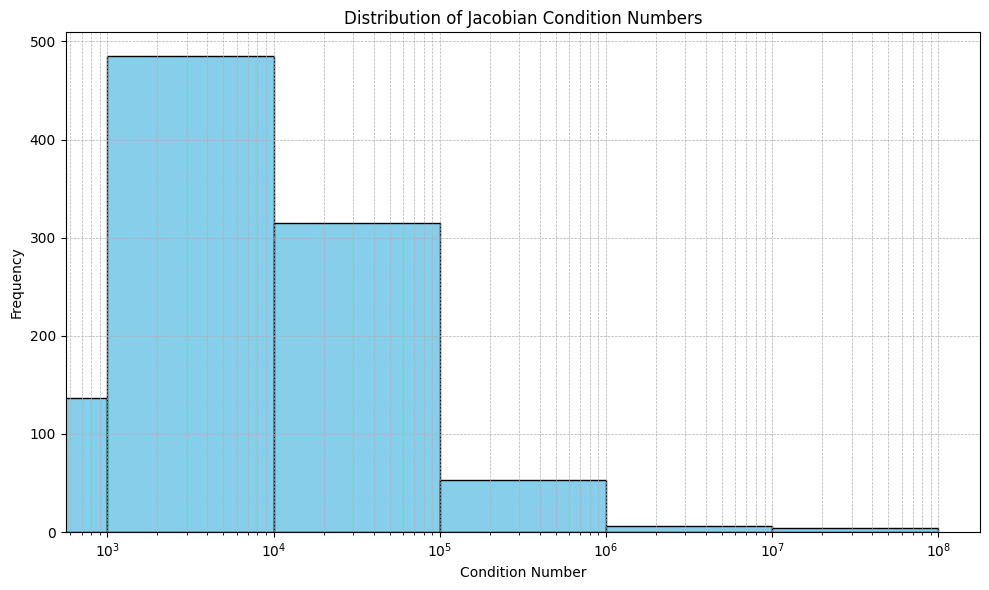

In [42]:



# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(condition_numbers, bins=[0, 999, 9999, 99999, 999999, 9999999, 99999999], 
              color='skyblue', edgecolor='black')
plt.title("Distribution of Jacobian Condition Numbers")
plt.xlabel("Condition Number")
plt.ylabel("Frequency")
plt.xscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



## Minimum Norm Solution


In [54]:

'''



delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0])  # e.g. raise o_fta by 50

x0    = PDFshapingOBJ.X_test_tr[0]
y0, _ = model_Forward(x0.to(device))

J = jacobian(wrapped_model, x0)
U, S, Vh = torch.linalg.svd(J, full_matrices=False)

S_inv = torch.diag(1.0 / S)
J_pinv = Vh.T @ S_inv @ U.T

delta_x = J_pinv @ delta_y

x1 = x0 + delta_x
y1, _ = model_Forward(x1.to(device))

print("Original y:", y0)
print("New y after delta_x:", y1)
print("Target y should be:", y0 + delta_y)

'''



'\n\n\n\ndelta_y = torch.tensor([0.0, 0.0, 0.0, 50.0])  # e.g. raise o_fta by 50\n\nx0    = PDFshapingOBJ.X_test_tr[0]\ny0, _ = model_Forward(x0.to(device))\n\nJ = jacobian(wrapped_model, x0)\nU, S, Vh = torch.linalg.svd(J, full_matrices=False)\n\nS_inv = torch.diag(1.0 / S)\nJ_pinv = Vh.T @ S_inv @ U.T\n\ndelta_x = J_pinv @ delta_y\n\nx1 = x0 + delta_x\ny1, _ = model_Forward(x1.to(device))\n\nprint("Original y:", y0)\nprint("New y after delta_x:", y1)\nprint("Target y should be:", y0 + delta_y)\n\n'


## test


In [45]:

def get_jacobian_MinNormSolution(x_point, delta_y):
    x_point = x_point.detach().clone().requires_grad_(True)
    J = jacobian(wrapped_model, x_point)  # shape [4, 4]

    # SVD
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Condition number
    if s.min().item() < 1e-12:
        cond_number = float('inf')
        delta_x = None
    else:
        cond_number = s.max().item() / s.min().item()
        # Ensure proper shapes for matrix multiplication
        S_inv = torch.diag(1.0 / s)
        J_pinv = v @ S_inv @ u.T  # shape [4, 4]
        delta_y = delta_y.view(-1, 1)  # make it shape [4, 1]
        delta_x = (J_pinv @ delta_y).view(-1)  # flatten back to [4]

    return rank, cond_number, delta_x




In [51]:

'''




# Reasonable delta_y: try increasing o_fta (last output) by 50 units
delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0], dtype=torch.float32).to(device)

# Results
condition_numbers = []
errors = []

for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i].to(device)

    rank, cond_number, delta_x = get_jacobian_MinNormSolution(x_i, delta_y)

    if delta_x is None:
        error = float('inf')
        msg = "❌ not invertible (singular)"
    else:
        x_new = x_i + delta_x
        y_orig, _ = model_Forward(x_i)
        y_new, _ = model_Forward(x_new)

        target_y = y_orig + delta_y
        error = torch.norm(y_new - target_y).item()

        # Simple interpretation
        if error < 5 and cond_number < 100:
            msg = "✅ invertible and stable"
        elif error < 15 and cond_number < 10000:
            msg = "⚠️ moderate error"
        else:
            msg = "❌ unstable or inaccurate"

    print(f"Sample {i}: error={error:.2f}, cond={cond_number:.2e}, rank={rank} → {msg}")
    condition_numbers.append(cond_number)
    errors.append(error)

'''



'\n\n\n\n\n# Reasonable delta_y: try increasing o_fta (last output) by 50 units\ndelta_y = torch.tensor([0.0, 0.0, 0.0, 50.0], dtype=torch.float32).to(device)\n\n# Results\ncondition_numbers = []\nerrors = []\n\nfor i in range(1000):\n    x_i = PDFshapingOBJ.X_test_tr[i].to(device)\n\n    rank, cond_number, delta_x = get_jacobian_MinNormSolution(x_i, delta_y)\n\n    if delta_x is None:\n        error = float(\'inf\')\n        msg = "❌ not invertible (singular)"\n    else:\n        x_new = x_i + delta_x\n        y_orig, _ = model_Forward(x_i)\n        y_new, _ = model_Forward(x_new)\n\n        target_y = y_orig + delta_y\n        error = torch.norm(y_new - target_y).item()\n\n        # Simple interpretation\n        if error < 5 and cond_number < 100:\n            msg = "✅ invertible and stable"\n        elif error < 15 and cond_number < 10000:\n            msg = "⚠️ moderate error"\n        else:\n            msg = "❌ unstable or inaccurate"\n\n    print(f"Sample {i}: error={error:.2f}


## Torch function instead of pure equations


In [52]:

def get_jacobian_MinNormSolution(x_point, delta_y):
    x_point = x_point.detach().clone().requires_grad_(True)

    # Jacobian
    J = jacobian(wrapped_model, x_point)   # shape [4, 4]

    # SVD for diagnostics only
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Condition number
    if s.min().item() < 1e-12:
        cond_number = float('inf')
        delta_x = None
    else:
        cond_number = (s.max() / s.min()).item()

        # ✅ Minimum‑norm solution (robust)
        J_pinv = torch.linalg.pinv(J)
        delta_x = J_pinv @ delta_y

    return rank, cond_number, delta_x



In [53]:

delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0], device=device)

for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i].to(device)

    rank, cond_number, delta_x = get_jacobian_MinNormSolution(x_i, delta_y)

    if delta_x is None:
        print(f"Sample {i}: ❌ singular (rank={rank})")
        continue

    x_new = x_i + delta_x
    y_orig, _ = model_Forward(x_i)
    y_new, _ = model_Forward(x_new)

    error = torch.norm(y_new - (y_orig + delta_y)).item()

    # 🔎 Interpretation
    if error < 5 and cond_number < 100:
        msg = "✅ locally invertible"
    elif error < 20:
        msg = "⚠️ weakly invertible"
    else:
        msg = "❌ unstable inverse"

    print(
        f"Sample {i}: "
        f"rank={rank}, "
        f"cond={cond_number:.2e}, "
        f"error={error:.2f} → {msg}"
    )



Sample 0: rank=4, cond=3.11e+03, error=389.13 → ❌ unstable inverse
Sample 1: rank=4, cond=4.18e+02, error=1213.75 → ❌ unstable inverse
Sample 2: rank=4, cond=1.40e+04, error=703.28 → ❌ unstable inverse
Sample 3: rank=4, cond=2.79e+03, error=1837.28 → ❌ unstable inverse
Sample 4: rank=4, cond=6.48e+03, error=382.05 → ❌ unstable inverse
Sample 5: rank=4, cond=1.22e+04, error=359.14 → ❌ unstable inverse
Sample 6: rank=4, cond=4.99e+03, error=61.01 → ❌ unstable inverse
Sample 7: rank=4, cond=4.40e+03, error=1853.02 → ❌ unstable inverse
Sample 8: rank=4, cond=1.43e+04, error=1225.34 → ❌ unstable inverse
Sample 9: rank=4, cond=1.54e+04, error=121440.44 → ❌ unstable inverse
Sample 10: rank=4, cond=1.20e+03, error=51.91 → ❌ unstable inverse
Sample 11: rank=4, cond=3.42e+02, error=79.45 → ❌ unstable inverse
Sample 12: rank=4, cond=2.01e+03, error=1005.89 → ❌ unstable inverse
Sample 13: rank=4, cond=5.59e+02, error=1057.45 → ❌ unstable inverse
Sample 14: rank=4, cond=4.48e+04, error=77.31 → ❌ un

Sample 161: rank=4, cond=1.52e+04, error=394.39 → ❌ unstable inverse
Sample 162: rank=4, cond=9.38e+02, error=823.64 → ❌ unstable inverse
Sample 163: rank=4, cond=6.34e+04, error=8648.66 → ❌ unstable inverse
Sample 164: rank=4, cond=6.62e+04, error=19628.70 → ❌ unstable inverse
Sample 165: rank=4, cond=1.85e+04, error=439.20 → ❌ unstable inverse
Sample 166: rank=4, cond=1.15e+04, error=1563.96 → ❌ unstable inverse
Sample 167: rank=4, cond=7.10e+02, error=1208.41 → ❌ unstable inverse
Sample 168: rank=4, cond=6.41e+03, error=12430.63 → ❌ unstable inverse
Sample 169: rank=4, cond=1.43e+04, error=559.44 → ❌ unstable inverse
Sample 170: rank=4, cond=2.71e+03, error=2204.86 → ❌ unstable inverse
Sample 171: rank=4, cond=2.07e+03, error=2043.64 → ❌ unstable inverse
Sample 172: rank=4, cond=1.34e+03, error=2067.81 → ❌ unstable inverse
Sample 173: rank=4, cond=3.86e+06, error=283.68 → ❌ unstable inverse
Sample 174: rank=4, cond=4.57e+04, error=99.37 → ❌ unstable inverse
Sample 175: rank=4, cond=

Sample 350: rank=4, cond=1.38e+04, error=1894.09 → ❌ unstable inverse
Sample 351: rank=4, cond=1.45e+04, error=87.67 → ❌ unstable inverse
Sample 352: rank=4, cond=3.24e+05, error=72599.80 → ❌ unstable inverse
Sample 353: rank=4, cond=1.39e+04, error=1711.23 → ❌ unstable inverse
Sample 354: rank=4, cond=1.16e+04, error=31.57 → ❌ unstable inverse
Sample 355: rank=4, cond=6.72e+03, error=1132.20 → ❌ unstable inverse
Sample 356: rank=4, cond=1.23e+03, error=1166.01 → ❌ unstable inverse
Sample 357: rank=4, cond=6.84e+03, error=16.89 → ⚠️ weakly invertible
Sample 358: rank=4, cond=2.39e+03, error=1430.31 → ❌ unstable inverse
Sample 359: rank=4, cond=2.14e+04, error=2844.18 → ❌ unstable inverse
Sample 360: rank=4, cond=3.12e+05, error=40375.17 → ❌ unstable inverse
Sample 361: rank=4, cond=2.64e+04, error=58681.96 → ❌ unstable inverse
Sample 362: rank=4, cond=4.70e+03, error=326.51 → ❌ unstable inverse
Sample 363: rank=4, cond=4.46e+02, error=118.41 → ❌ unstable inverse
Sample 364: rank=4, con

Sample 533: rank=4, cond=2.90e+03, error=1105.15 → ❌ unstable inverse
Sample 534: rank=4, cond=1.96e+03, error=252.51 → ❌ unstable inverse
Sample 535: rank=4, cond=7.00e+04, error=926.71 → ❌ unstable inverse
Sample 536: rank=4, cond=4.07e+04, error=4942.30 → ❌ unstable inverse
Sample 537: rank=4, cond=4.76e+03, error=1397.84 → ❌ unstable inverse
Sample 538: rank=4, cond=1.30e+05, error=5872.73 → ❌ unstable inverse
Sample 539: rank=4, cond=5.31e+03, error=631.92 → ❌ unstable inverse
Sample 540: rank=4, cond=7.93e+02, error=3296.16 → ❌ unstable inverse
Sample 541: rank=4, cond=7.24e+03, error=2454.32 → ❌ unstable inverse
Sample 542: rank=4, cond=5.90e+03, error=30010.71 → ❌ unstable inverse
Sample 543: rank=4, cond=1.30e+03, error=304.75 → ❌ unstable inverse
Sample 544: rank=4, cond=1.12e+04, error=13239.00 → ❌ unstable inverse
Sample 545: rank=4, cond=8.56e+02, error=526.60 → ❌ unstable inverse
Sample 546: rank=4, cond=8.79e+04, error=792923.31 → ❌ unstable inverse
Sample 547: rank=4, c

Sample 722: rank=4, cond=1.43e+03, error=705.13 → ❌ unstable inverse
Sample 723: rank=4, cond=1.61e+05, error=37075.84 → ❌ unstable inverse
Sample 724: rank=4, cond=2.15e+02, error=435.24 → ❌ unstable inverse
Sample 725: rank=4, cond=1.05e+03, error=2103.06 → ❌ unstable inverse
Sample 726: rank=4, cond=3.41e+03, error=365.22 → ❌ unstable inverse
Sample 727: rank=4, cond=3.23e+02, error=126.74 → ❌ unstable inverse
Sample 728: rank=4, cond=9.06e+03, error=988.50 → ❌ unstable inverse
Sample 729: rank=4, cond=7.37e+03, error=616.00 → ❌ unstable inverse
Sample 730: rank=4, cond=1.78e+04, error=1338.22 → ❌ unstable inverse
Sample 731: rank=4, cond=3.70e+02, error=1042.88 → ❌ unstable inverse
Sample 732: rank=4, cond=2.09e+03, error=2775.58 → ❌ unstable inverse
Sample 733: rank=4, cond=4.26e+03, error=3418.91 → ❌ unstable inverse
Sample 734: rank=4, cond=3.02e+04, error=755.41 → ❌ unstable inverse
Sample 735: rank=4, cond=1.21e+03, error=107.26 → ❌ unstable inverse
Sample 736: rank=4, cond=1.

Sample 892: rank=4, cond=1.87e+03, error=1583.56 → ❌ unstable inverse
Sample 893: rank=4, cond=3.39e+04, error=1320.45 → ❌ unstable inverse
Sample 894: rank=4, cond=1.22e+03, error=2523.27 → ❌ unstable inverse
Sample 895: rank=4, cond=8.50e+02, error=5307.38 → ❌ unstable inverse
Sample 896: rank=4, cond=2.12e+05, error=14393.01 → ❌ unstable inverse
Sample 897: rank=4, cond=8.64e+03, error=260.76 → ❌ unstable inverse
Sample 898: rank=4, cond=1.50e+04, error=7297.36 → ❌ unstable inverse
Sample 899: rank=4, cond=3.15e+04, error=1645.35 → ❌ unstable inverse
Sample 900: rank=4, cond=3.56e+03, error=1215.43 → ❌ unstable inverse
Sample 901: rank=4, cond=4.53e+03, error=3087.43 → ❌ unstable inverse
Sample 902: rank=4, cond=9.39e+02, error=1804.76 → ❌ unstable inverse
Sample 903: rank=4, cond=3.11e+03, error=131.40 → ❌ unstable inverse
Sample 904: rank=4, cond=2.55e+03, error=1198.47 → ❌ unstable inverse
Sample 905: rank=4, cond=6.74e+03, error=203.08 → ❌ unstable inverse
Sample 906: rank=4, co


## Example of Min Norm Solution


In [61]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0 = torch.randn(1, input_dim)
target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)
x_new = x0 + delta_x

print( x_new )



tensor([[-6316.5049,  7169.8481,   308.4885,  -300.8671]],
       grad_fn=<AddBackward0>)



## Iterative approach


In [179]:





def compute_jacobian(f, x):
    y = f(x)                    # shape [1,4]
    y = y.squeeze(0)            # now shape [4]
    
    output_dim = y.shape[0]
    input_dim  = x.shape[0]
    
    J = torch.zeros(output_dim, input_dim)

    for i in range(output_dim):
        grad_y = torch.autograd.grad(
            y[i],               # this is now a REAL scalar
            x,
            retain_graph=True
        )[0]
        
        J[i] = grad_y.detach()
    
    return J





In [180]:


def min_norm_inverse(f, y_target, x_init, steps=0, lr=1.0, tol=1e-5):
    """
    If steps == 0 → single-step min-norm inverse.
    If steps > 0 → iterative pseudoinverse update.
    """
    x = x_init.clone().detach().requires_grad_()

    for i in range(max(1, steps)):
        y = f(x)
        delta_y = y_target - y

        # Break early if iterative and already close
        if steps > 0 and torch.norm(delta_y) < tol:
            break

        # Compute Jacobian J = dy/dx
        J = compute_jacobian(f, x)
        
        
        delta_y = delta_y.squeeze(0)


        # Min-norm delta_x
        delta_x = torch.linalg.pinv(J) @ delta_y

        # Update
        x = x + lr * delta_x
        x = x.detach().requires_grad_()

        if steps == 0:
            break  # only do 1 step for steps=0 case

    return x.detach()



In [181]:


input_dim  = 4
output_dim = 4

x_init   = torch.randn(1, input_dim)
y_target = torch.randn(1, output_dim)


x_init = x_init.squeeze(0).detach().clone().requires_grad_(True)
y_target = y_target.squeeze(0)



In [182]:

print(x_init)
print(y_target)


tensor([-0.7303, -0.4392, -0.1116, -0.9985], requires_grad=True)
tensor([ 1.1848,  0.6566,  2.7363, -1.3489])


In [183]:

print("x_init shape:", x_init.shape)



x_init shape: torch.Size([4])



## Steps = 0

* so just once 


In [184]:

x_solution = min_norm_inverse(wrapped_model, y_target, x_init, steps=0)



In [185]:

print( x_solution.shape) 
print( x_solution) 



torch.Size([4])
tensor([-2827.4050,  3737.2947,  -140.8745,   197.6914])


In [186]:



x_solution = pca.inverse_transform(x_solution)

print( x_solution )



[  -99.05403154    91.06020136   453.37125995    31.31949816
 -2538.62550749 -2298.23969465   171.07400554]



## Multiple Steps


* steps = 10
* a learning process via Jacobian


In [187]:

x_solution = min_norm_inverse(wrapped_model, y_target, x_init, steps=10, lr=1.0)



In [188]:

print( x_solution.shape) 
print( x_solution) 


torch.Size([4])
tensor([-1849850.5000,  -251206.7500,    -2692.6719,  -102082.2500])


In [189]:

x_solution = pca.inverse_transform(x_solution)

print( x_solution )


[  -33396.28530296     5061.19206486    36510.57465665    -1066.74213187
 -1851601.68608929   253575.58687474    -4086.24251981]



## other function with equations 


In [190]:

'''




def inverse_min_norm_solver(forward_model, y_target, x_init, n_iter=0, lr=1.0):
    """
    Solve f(x) ≈ y_target via inverse Jacobian update (min-norm solution).
    If n_iter = 0, do one-shot linear solve: Δx = J⁺ Δy
    If n_iter > 0, apply Δx iteratively, re-evaluating f and J each time
    """
    x = x_init.clone().detach().requires_grad_(True)

    for i in range(n_iter + 1):
        y_pred = forward_model(x)
        delta_y = (y_target - y_pred).detach()

        # Compute Jacobian J
        J = torch.autograd.functional.jacobian(forward_model, x).squeeze()

        # SVD for min-norm pseudoinverse
        U, S, Vh = torch.linalg.svd(J, full_matrices=False)
        S_inv = torch.diag(1.0 / S)
        J_pinv = Vh.T @ S_inv @ U.T

        delta_x = J_pinv @ delta_y

        # Stop early if one-shot
        if n_iter == 0:
            x_new = x + lr * delta_x
            return x_new.detach()

        # Iteratively update x
        x = (x + lr * delta_x).detach().requires_grad_(True)

    return x.detach()


'''



'\n\n\n\n\ndef inverse_min_norm_solver(forward_model, y_target, x_init, n_iter=0, lr=1.0):\n    """\n    Solve f(x) ≈ y_target via inverse Jacobian update (min-norm solution).\n    If n_iter = 0, do one-shot linear solve: Δx = J⁺ Δy\n    If n_iter > 0, apply Δx iteratively, re-evaluating f and J each time\n    """\n    x = x_init.clone().detach().requires_grad_(True)\n\n    for i in range(n_iter + 1):\n        y_pred = forward_model(x)\n        delta_y = (y_target - y_pred).detach()\n\n        # Compute Jacobian J\n        J = torch.autograd.functional.jacobian(forward_model, x).squeeze()\n\n        # SVD for min-norm pseudoinverse\n        U, S, Vh = torch.linalg.svd(J, full_matrices=False)\n        S_inv = torch.diag(1.0 / S)\n        J_pinv = Vh.T @ S_inv @ U.T\n\n        delta_x = J_pinv @ delta_y\n\n        # Stop early if one-shot\n        if n_iter == 0:\n            x_new = x + lr * delta_x\n            return x_new.detach()\n\n        # Iteratively update x\n        x = (x + l